In [2]:
import tensorflow as tf
import os
from tensorflow import keras
import keras_preprocessing as kp

In [3]:
import cv2
import imghdr
#https://www.kaggle.com/code/kausthubkannan/ai-human-art-classification-mobilenetv2-91/notebook

In [4]:
os.listdir('AIandRealArt/train/')
data_loc = 'AIandRealArt/train/'

In [5]:
imgtypes = ['jpg','png','jpeg']
for iclass in os.listdir(data_loc):
    for image in os.listdir(os.path.join(data_loc,iclass)):
        image_path = os.path.join(data_loc,iclass,image)
        try:
            img = cv2.imread(image_path)
            typ = imghdr.what(image_path)
            if typ not in imgtypes:
                os.remove(image_path)
                print('Issue 1')
            else:
                print('None')
        except Exception as e:
            print("Issue")

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [6]:
import numpy as np
from matplotlib import  pyplot as plt

In [7]:
data = tf.keras.preprocessing.image_dataset_from_directory(data_loc)

Found 18618 files belonging to 2 classes.


In [8]:
data_it = data.as_numpy_iterator()

In [9]:
batch = data_it.next()

In [10]:
batch[0].shape

(32, 256, 256, 3)

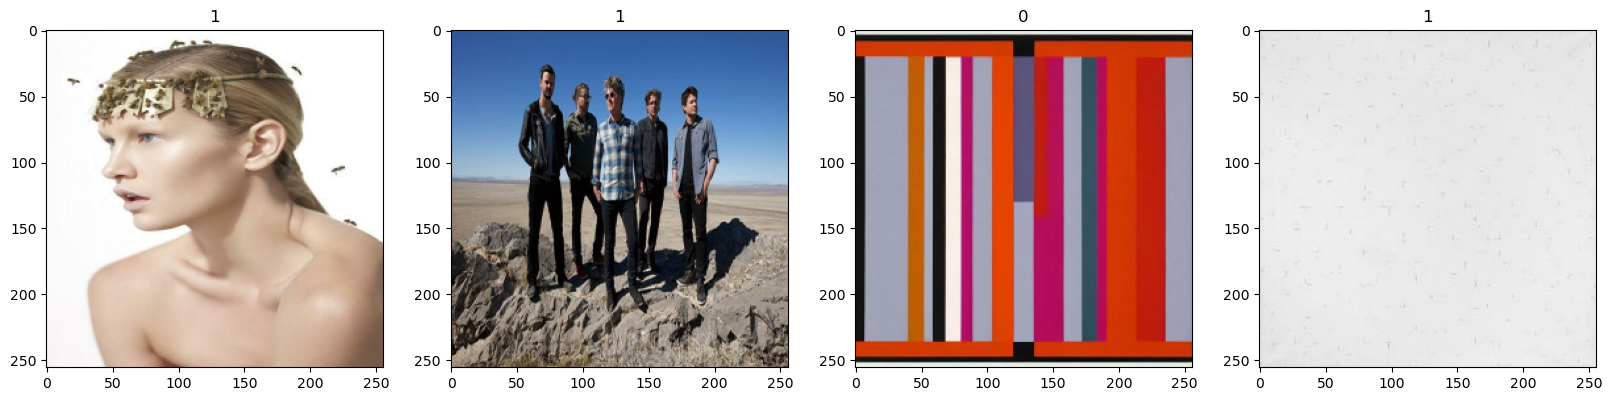

In [11]:
fig, ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

1 - Real
0 - AI

In [12]:
scaled_dat = batch[0]/255

In [13]:
data_scaled = data.map(lambda x,y :((x/255),y))

In [14]:
data_it_scaled = data_scaled.as_numpy_iterator()

In [15]:
batch_scaled = data_it_scaled.next()
batch_scaled[0]

array([[[[0.8568627 , 0.87647057, 0.85294116],
         [0.8568627 , 0.87647057, 0.85294116],
         [0.8568627 , 0.87647057, 0.85294116],
         ...,
         [0.8137255 , 0.8372549 , 0.82941175],
         [0.8137255 , 0.8372549 , 0.82941175],
         [0.8137255 , 0.8372549 , 0.82941175]],

        [[0.85882354, 0.8784314 , 0.85490197],
         [0.85882354, 0.8784314 , 0.85490197],
         [0.85882354, 0.8784314 , 0.85490197],
         ...,
         [0.8117647 , 0.8352941 , 0.827451  ],
         [0.8117647 , 0.8352941 , 0.827451  ],
         [0.8117647 , 0.8352941 , 0.827451  ]],

        [[0.8627451 , 0.88235295, 0.85882354],
         [0.8627451 , 0.88235295, 0.85882354],
         [0.8627451 , 0.88235295, 0.85882354],
         ...,
         [0.80784315, 0.83137256, 0.8235294 ],
         [0.80784315, 0.83137256, 0.8235294 ],
         [0.80784315, 0.83137256, 0.8235294 ]],

        ...,

        [[0.50392157, 0.5745098 , 0.5901961 ],
         [0.49215686, 0.5627451 , 0.57843137]

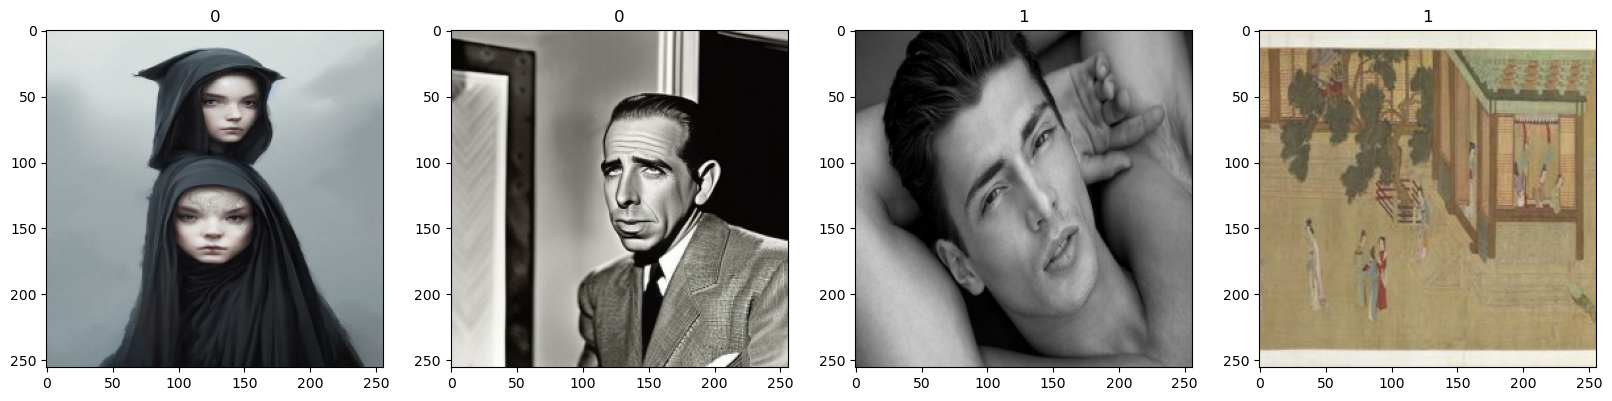

In [16]:
fig, ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx,img in enumerate(batch_scaled[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch_scaled[1][idx])

In [17]:
train_size = int(len(data)*0.9)
val_size = int(len(data)*0.1)+1


In [18]:
train = data_scaled.take(train_size)
validation = data.skip(train_size).take(val_size)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16,(3,3),1,activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

In [24]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train,epochs=5,validation_data=validation, callbacks=[tensorboard_callback])


Epoch 1/5
  1/523 [..............................] - ETA: 3s - loss: 0.6966 - accuracy: 0.5000WARNING:tensorflow:From c:\Users\thedu\anaconda3\envs\tens\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
336/523 [==================>...........] - ETA: 2:44 - loss: 0.3640 - accuracy: 0.8284

KeyboardInterrupt: 

In [ ]:
tt = cv2.imread('39.jpg')
plt.imshow(tt)

NameError: name 'cv2' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


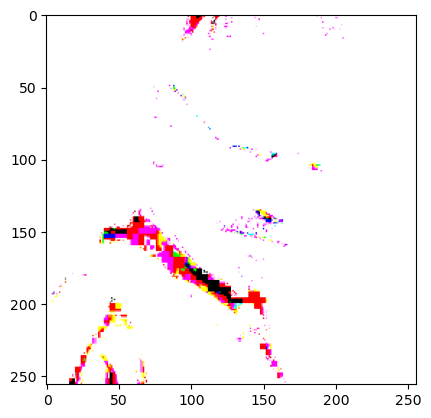

In [ ]:
resize = tf.image.resize(tt,(256,256))
plt.imshow(resize)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

In [ ]:
yhat

array([[1.3867723e-05]], dtype=float32)